# TRABAJO DE FIN DE MÁSTER: 
## Análisis de la educación financiera de los hogares españoles

Ignacio Pemán, Manuel Arias, Gonzalo Esponera y Borja Lacalle

#### data_2021 Cleaning

##### Decription 

In [1]:
# importar librerias necesarias para analisis de datos y visualizacion

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# cargar datos con separacion ;
data_2021 = pd.read_csv("INFE_Spain_csv_2021.csv", sep=";")
data_2021

,ID,wght,QD1,QD2,QD3,QD4,QD5_1,QD5_2,QD5_3,QD5_4,...,QD11_4,QD11_5,QD11_6,QD11_7,QD11_8,QD11_9,QD11_10,QD11_99,QD12,QD13
0,1,2594.2485,0,8,if equal or above 15000,Spanish,0,0,0,1,...,0,0,0,0,0,0,0,0,1,Between 15000 and 47000 euro
1,2,1825.7745,1,11,if below 15000,Spanish,0,1,1,0,...,0,0,0,0,0,0,0,0,1,Between 15000 and 47000 euro
2,3,3207.1128,1,14,if equal or above 15000,Spanish,0,1,1,0,...,0,0,0,0,0,0,0,0,0,Below 15000 euro -bottom 25
3,4,3009.3894,0,8,if below 15000,Spanish,0,1,1,0,...,0,0,0,0,0,0,0,0,1,Above 47000 euro -top 25
4,5,5779.9355,1,9,if equal or above 15000,Spanish,0,1,0,1,...,0,0,0,0,0,0,0,0,0,Between 15000 and 47000 euro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7759,7760,4408.7930,1,4,if below 15000,Spanish,0,1,0,1,...,0,0,0,0,0,0,0,0,1,Between 15000 and 47000 euro
7760,7761,11130.0900,0,10,if equal or above 15000,Spanish,0,1,0,0,...,1,0,0,0,0,0,0,0,1,Between 15000 and 47000 euro
7761,7762,1201.2681,1,11,if equal or above 15000,Spanish,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Do not know
7762,7763,7075.0142,0,12,if equal or above 15000,Spanish,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Refuse to answer


In [2]:
# convertir columna id en indice
data_2021 = data_2021.set_index("ID")
data_2021.head()

,wght,QD1,QD2,QD3,QD4,QD5_1,QD5_2,QD5_3,QD5_4,QD5_5,...,QD11_4,QD11_5,QD11_6,QD11_7,QD11_8,QD11_9,QD11_10,QD11_99,QD12,QD13
ID,,,,,,,,,,,,,,,,,,,,,
1,2594.2485,0,8,if equal or above 15000,Spanish,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,Between 15000 and 47000 euro
2,1825.7745,1,11,if below 15000,Spanish,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,Between 15000 and 47000 euro
3,3207.1128,1,14,if equal or above 15000,Spanish,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,Below 15000 euro -bottom 25
4,3009.3894,0,8,if below 15000,Spanish,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,Above 47000 euro -top 25
5,5779.9355,1,9,if equal or above 15000,Spanish,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,Between 15000 and 47000 euro


In [3]:
# Mostrar estadísticas descriptivas de las columnas numéricas
print(data_2021.describe())

# Verificar tipos de datos y valores faltantes
print(data_2021.info())

               wght          QD1          QD2        QD5_1        QD5_2  \
count   7764.000000  7764.000000  7764.000000  7764.000000  7764.000000   
mean    4639.768677     0.518805     8.822257     0.123776     0.621716   
std     2990.281480     0.499678     4.787225     0.329348     0.484990   
min      420.189910     0.000000     1.000000     0.000000     0.000000   
25%     2446.758500     0.000000     5.000000     0.000000     0.000000   
50%     3852.094450     1.000000     9.000000     0.000000     1.000000   
75%     6402.205600     1.000000    13.000000     0.000000     1.000000   
max    19411.416000     1.000000    17.000000     1.000000     1.000000   

             QD5_3        QD5_4        QD5_5        QD5_6        QD5_7  ...  \
count  7764.000000  7764.000000  7764.000000  7764.000000  7764.000000  ...   
mean      0.269835     0.209557     0.231195     0.002061     0.004894  ...   
std       0.443903     0.407019     0.421624     0.045352     0.069793  ...   
min     

In [4]:
# mostrar los tipos de datos de las columnas
data_2021.dtypes

wght       float64
QD1          int64
QD2          int64
QD3         object
QD4         object
            ...   
QD11_9       int64
QD11_10      int64
QD11_99      int64
QD12         int64
QD13        object
Length: 193, dtype: object

##### Distribución de las edades


In [5]:
data_2021_describe = data_2021.describe(include='all')
data_2021_describe['QD7']

count     7764.000000
unique            NaN
top               NaN
freq              NaN
mean        46.959299
std         15.649587
min         18.000000
25%         35.000000
50%         47.000000
75%         59.000000
max         80.000000
Name: QD7, dtype: float64

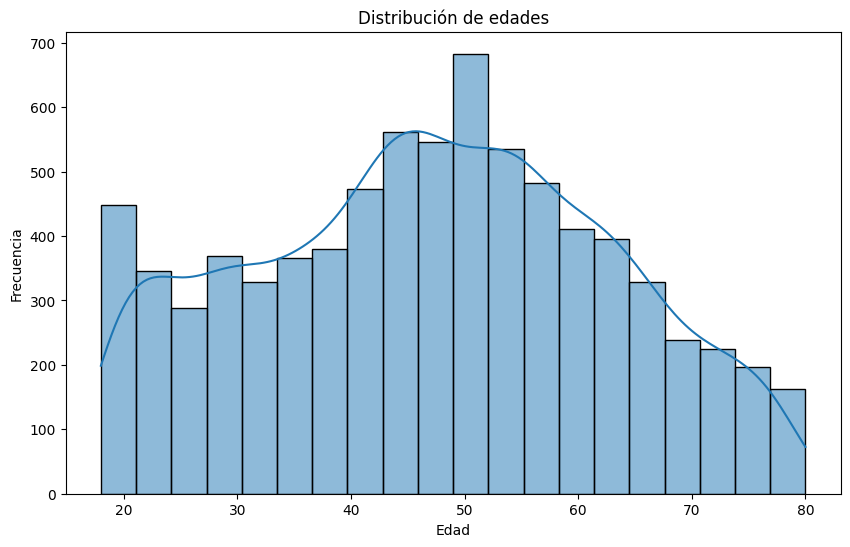

In [6]:
# histograma con la distribución de las edades (columna QD7)
plt.figure(figsize=(10, 6))
sns.histplot(data = data_2021, x="QD7", bins=20, kde=True)
plt.title("Distribución de edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

##### Missing values

In [7]:
# Generando una tabla con la cantidad de valores missing para cada columna y su porcentje
missing_values = data_2021.isnull().sum()
missing_values_percent = 100 * data_2021.isnull().sum() / len(data_2021)
missing_values_table = pd.concat([missing_values, missing_values_percent], axis=1)
missing_values_table = missing_values_table.rename(columns={0: "Missing Values", 1: "%"})
missing_values_table = missing_values_table[missing_values_table.iloc[:, 1] != 0].sort_values("%", ascending=False).round(1)
print("Hay " + str(missing_values_table.shape[0]) + " columnas con valores faltantes")
missing_values_table


Hay 43 columnas con valores faltantes


,Missing Values,%
QF3_4,7764,100.0
QP7_2,7764,100.0
QP2_17,7764,100.0
QP3_4,7764,100.0
QP3_6,7764,100.0
QP3_8,7764,100.0
QP3_10,7764,100.0
QP3_14,7764,100.0
QP3_15,7764,100.0
QP3_17,7764,100.0


In [8]:
#eliminar todas las columnas con valores nulos ya que el 100% de los datos son nulos
data_2021 = data_2021.dropna(axis=1)
data_2021

,wght,QD1,QD2,QD3,QD4,QD5_1,QD5_2,QD5_3,QD5_4,QD5_5,...,QD11_4,QD11_5,QD11_6,QD11_7,QD11_8,QD11_9,QD11_10,QD11_99,QD12,QD13
ID,,,,,,,,,,,,,,,,,,,,,
1,2594.2485,0,8,if equal or above 15000,Spanish,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,Between 15000 and 47000 euro
2,1825.7745,1,11,if below 15000,Spanish,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,Between 15000 and 47000 euro
3,3207.1128,1,14,if equal or above 15000,Spanish,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,Below 15000 euro -bottom 25
4,3009.3894,0,8,if below 15000,Spanish,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,Above 47000 euro -top 25
5,5779.9355,1,9,if equal or above 15000,Spanish,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,Between 15000 and 47000 euro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7760,4408.7930,1,4,if below 15000,Spanish,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,Between 15000 and 47000 euro
7761,11130.0900,0,10,if equal or above 15000,Spanish,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,Between 15000 and 47000 euro
7762,1201.2681,1,11,if equal or above 15000,Spanish,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,Do not know


In [9]:
# mostrar columnas con valores missing
data_2021.columns[data_2021.isnull().sum() > 0]

Index([], dtype='object')

##### Columnas tipo object (encoding?)

In [10]:
# mostrar columnas con valores tipo object
data_2021.dtypes[data_2021.dtypes == "object"]

QD3     object
QD4     object
QP4     object
QD13    object
dtype: object

In [11]:
# mostrar valores de la columna QD3
data_2021["QD3"].value_counts()


QD3
if equal or above 15000    5361
if below 15000             2403
Name: count, dtype: int64

In [12]:
# label encoding para la columna QD3
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_2021['QD3_encoded'] = le.fit_transform(data_2021['QD3'])
data_2021['QD3_encoded'].value_counts()

QD3_encoded
1    5361
0    2403
Name: count, dtype: int64

In [13]:
print(data_2021[['QD3', 'QD3_encoded']].head())


                        QD3  QD3_encoded
ID                                      
1   if equal or above 15000            1
2            if below 15000            0
3   if equal or above 15000            1
4            if below 15000            0
5   if equal or above 15000            1


In [14]:
# mostrar valores columna QD4
print(data_2021["QD4"].value_counts())

QD4
Spanish    7764
Name: count, dtype: int64


In [15]:
# ELIMINAR COLUMNA QD4
data_2021 = data_2021.drop(columns="QD4")

In [16]:
# mostrar valores columna QD13
print(data_2021["QD13"].value_counts())

QD13
Between 15000 and 47000 euro                    4060
Below 15000 euro -bottom 25                     1712
Above 47000 euro -top 25                        1510
Do not know                                      240
Refuse to answer                                 222
Missing because of interviewer or CAPI error      20
Name: count, dtype: int64


In [17]:
data_encoded_2021 = pd.get_dummies(data_2021, columns=['QD13'], prefix='Income')
print(data_encoded_2021.head())


         wght  QD1  QD2                      QD3  QD5_1  QD5_2  QD5_3  QD5_4  \
ID                                                                             
1   2594.2485    0    8  if equal or above 15000      0      0      0      1   
2   1825.7745    1   11           if below 15000      0      1      1      0   
3   3207.1128    1   14  if equal or above 15000      0      1      1      0   
4   3009.3894    0    8           if below 15000      0      1      1      0   
5   5779.9355    1    9  if equal or above 15000      0      1      0      1   

    QD5_5  QD5_6  ...  QD11_10  QD11_99  QD12  QD3_encoded  \
ID                ...                                        
1       0      0  ...        0        0     1            1   
2       0      0  ...        0        0     1            0   
3       0      0  ...        0        0     0            1   
4       0      0  ...        0        0     1            0   
5       0      0  ...        0        0     0            1   

    

In [18]:
# Identificar las columnas generadas por pd.get_dummies()
dummy_columns = [col for col in data_encoded_2021 if col.startswith('Income')]

# Convertir sólo esas columnas a uint8 para que salgan como 0 y 1
for column in dummy_columns:
    data_encoded_2021[column] = data_encoded_2021[column].astype('uint8')

print(data_encoded_2021[dummy_columns].head())


    Income_Above 47000 euro -top 25  Income_Below 15000 euro -bottom 25  \
ID                                                                        
1                                 0                                   0   
2                                 0                                   0   
3                                 0                                   1   
4                                 1                                   0   
5                                 0                                   0   

    Income_Between 15000 and 47000 euro  Income_Do not know  \
ID                                                            
1                                     1                   0   
2                                     1                   0   
3                                     0                   0   
4                                     0                   0   
5                                     1                   0   

    Income_Missing because of in

In [19]:
# mostrar valores columna QP4
print(data_encoded_2021["QP4"].value_counts())

QP4
-98                                5930
An unsecured bank loan              377
Insurance                           304
A credit card                       261
An investment account               236
Crypto-assets                       180
Stocks and shares                   164
A mortgage                          161
A savings account                    61
A pension or retirement product      48
0                                    27
Bonds                                 8
-97                                   4
-5                                    2
-99                                   1
Name: count, dtype: int64


In [20]:
# Convertir los códigos a strings para que representen categorías
def label_product(row):
    if row == '-99':
        return 'Refused_to_answer'
    elif row == '-97':
        return 'Dont_know'
    elif row == '0':
        return 'Not_voluntarily_chosen'
    elif row == '-98':
        return 'Not_applicable'
    elif row == '-5':
        return 'Error'
    else:
        return f'{row}'

data_encoded_2021['QP4'] = data_encoded_2021['QP4'].apply(label_product)
print(data_encoded_2021['QP4'].value_counts())

# Aplicar One-Hot Encoding
data_encoded_2021 = pd.get_dummies(data_encoded_2021, columns=['QP4'], prefix='Product')

# Verificamos el resultado
print(data_encoded_2021.filter(regex='Product_').head())


QP4
Not_applicable                     5930
An unsecured bank loan              377
Insurance                           304
A credit card                       261
An investment account               236
Crypto-assets                       180
Stocks and shares                   164
A mortgage                          161
A savings account                    61
A pension or retirement product      48
Not_voluntarily_chosen               27
Bonds                                 8
Dont_know                             4
Error                                 2
Refused_to_answer                     1
Name: count, dtype: int64
    Product_A credit card  Product_A mortgage  \
ID                                              
1                   False               False   
2                   False                True   
3                   False               False   
4                   False               False   
5                   False               False   

    Product_A pension or r

In [21]:
# Identificar las columnas generadas por pd.get_dummies()
dummy_columns = [col for col in data_encoded_2021 if col.startswith('Product')]


# Convertir sólo esas columnas a uint8 para que salgan como 0 y 1
for column in dummy_columns:
    data_encoded_2021[column] = data_encoded_2021[column].astype('uint8')

print(data_encoded_2021[dummy_columns].head())

    Product_A credit card  Product_A mortgage  \
ID                                              
1                       0                   0   
2                       0                   1   
3                       0                   0   
4                       0                   0   
5                       0                   0   

    Product_A pension or retirement product  Product_A savings account  \
ID                                                                       
1                                         0                          0   
2                                         0                          0   
3                                         0                          0   
4                                         0                          0   
5                                         0                          0   

    Product_An investment account  Product_An unsecured bank loan  \
ID                                                                  

In [22]:
#ver las ultimas 30 columnas y todas las filas
data_encoded_2021.iloc[:, -20:]


,Income_Below 15000 euro -bottom 25,Income_Between 15000 and 47000 euro,Income_Do not know,Income_Missing because of interviewer or CAPI error,Income_Refuse to answer,Product_A credit card,Product_A mortgage,Product_A pension or retirement product,Product_A savings account,Product_An investment account,Product_An unsecured bank loan,Product_Bonds,Product_Crypto-assets,Product_Dont_know,Product_Error,Product_Insurance,Product_Not_applicable,Product_Not_voluntarily_chosen,Product_Refused_to_answer,Product_Stocks and shares
ID,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7760,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7761,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7762,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


##### deteccion de outliers

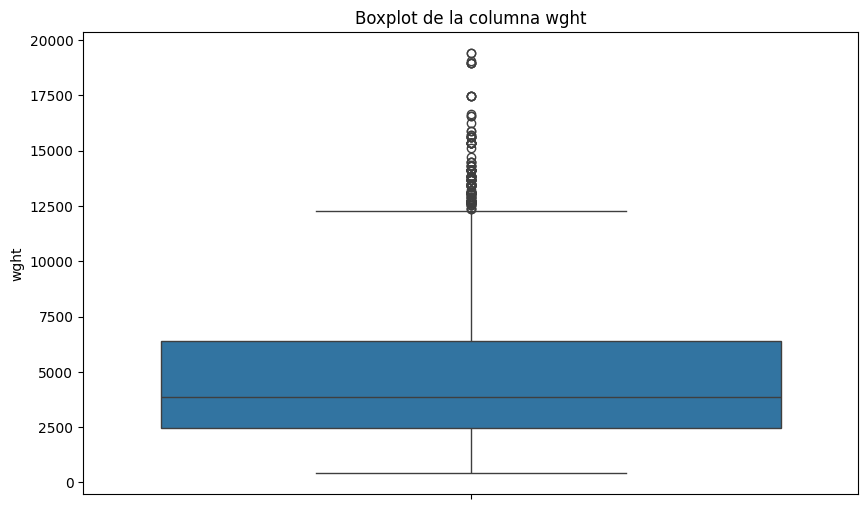

Número de outliers detectados: 140
Límite inferior para outliers: -3486.41215
Límite superior para outliers: 12335.376250000001


In [23]:
#deteccion de outliers en todas las columnas 
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico boxplot para la columna 'wght'
plt.figure(figsize=(10, 6))
sns.boxplot(data_encoded_2021['wght'])
plt.title('Boxplot de la columna wght')
plt.show()

# Calculando el IQR para la columna 'wght'
Q1 = data_encoded_2021['wght'].quantile(0.25)
Q3 = data_encoded_2021['wght'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = data_encoded_2021[(data_encoded_2021['wght'] < lower_bound) | (data_encoded_2021['wght'] > upper_bound)]
print('Número de outliers detectados:', len(outliers))
print('Límite inferior para outliers:', lower_bound)
print('Límite superior para outliers:', upper_bound)



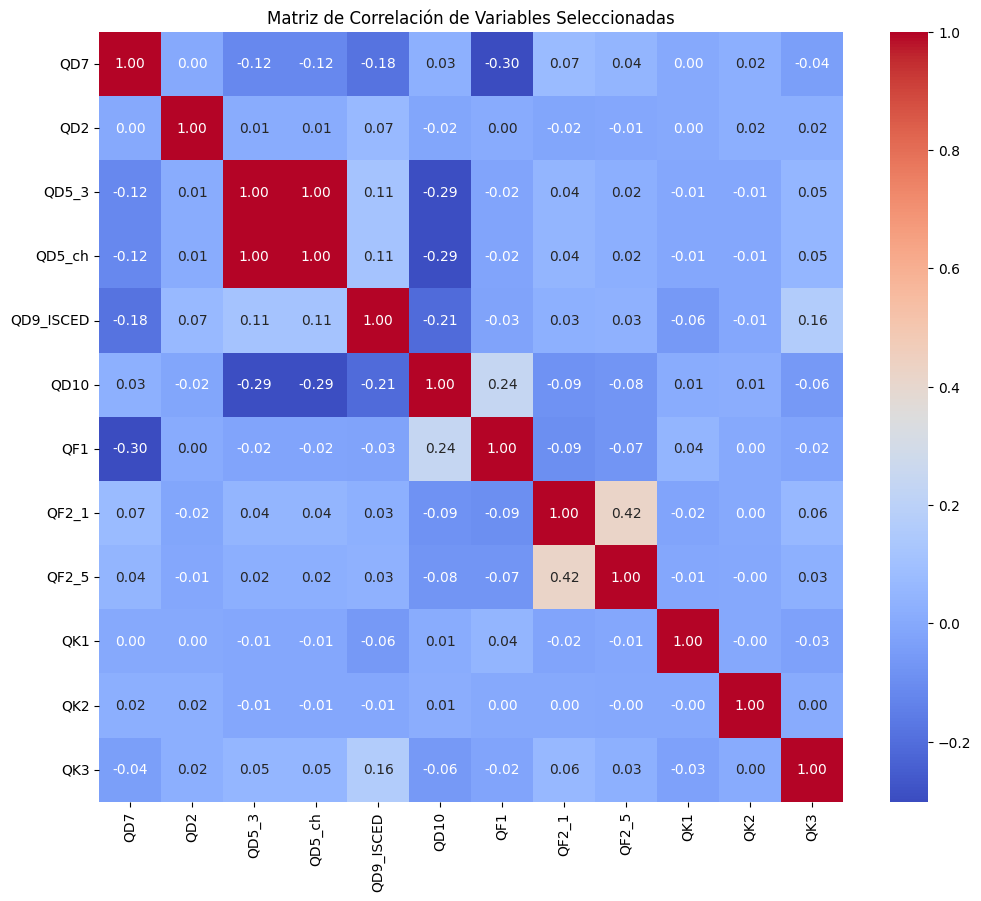

In [31]:
variables_of_interest = [
    'QD7',  'QD2', 'QD5_3', 'QD5_ch', 'QD9_ISCED', 'QD10', # Ejemplo de una variable demográfica: edad
    'QF1',  'QF2_1',  'QF2_5',  # Ejemplo de variables de comportamiento financiero
    'QK1', 'QK2',  'QK3',  # Ejemplo de preguntas de conocimiento financiero
    # Agrega más variables que consideres relevantes
]

# Crea un nuevo DataFrame solo con esas variables
sub_data = data_encoded_2021[variables_of_interest]

# Calcula la matriz de correlación para el nuevo subconjunto de datos
correlation_matrix = sub_data.corr()

# Crea un heatmap de Seaborn para la nueva matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables Seleccionadas')
plt.show()


In [ ]:
## ver valores distintos de las variables QF2_99 Y QF2_97
print(data_encoded_2021['QF2_99'].value_counts())
print(data_encoded_2021['QF2_97'].value_counts())

QF2_99
0    7762
1       2
Name: count, dtype: int64
QF2_97
0    7749
1      15
Name: count, dtype: int64


In [29]:
## ver valores distintos de las variables QD9_ISCE 
print(data_encoded_2021['QD9_ISCED'].value_counts())

print(data_encoded_2021['QD9_ISCED'].unique())

QD9_ISCED
6    2129
3    1835
2    1717
5    1033
1     795
4      97
8      90
0      68
Name: count, dtype: int64
[3 6 1 4 2 5 0 8]
